# **Removing Duplicates**


### Install the Required Libraries


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 193.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 220.4 MB/s eta 0:00:00


### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [26]:
# Count the number of duplicate rows in the dataset
duplicate_rows = df.duplicated(keep='first').sum()
print(f'Number of duplicate rows: {duplicate_rows}')


Number of duplicate rows: 0


In [24]:
# Display the first few duplicate rows
duplicated_rows = df[df.duplicated()]
print("\nFirst few duplicate rows:")
print(duplicated_rows.head())


First few duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWor

### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [27]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()

# Verify the removal by counting the number of duplicate rows after removal
num_duplicates_after_removal = df.duplicated().sum()
print(num_duplicates_after_removal)

0


### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [28]:
# Identify missing values for all columns
missing_values = df.isnull().sum()
print("Missing values for all columns:")
print(missing_values)

Missing values for all columns:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [29]:
# Choose a column with significant missing values (e.g., 'EdLevel')
missing_column = 'EdLevel'

# Check if there are missing values in 'EdLevel'
if missing_values[missing_column] > 0:
    # Impute missing values in 'EdLevel' with the most frequent value (mode)
    mode_value = df[missing_column].mode()[0]
    df[missing_column].fillna(mode_value, inplace=True)
    print(f"\nImputed missing values in '{missing_column}' with the most frequent value: {mode_value}")
else:
    print(f"\nNo missing values in '{missing_column}'.")

# Display the first few rows after imputation
print("\nFirst few rows after imputation:")
print(df.head())


Imputed missing values in 'EdLevel' with the most frequent value: Bachelor’s degree (B.A., B.S., B.Eng., etc.)

First few rows after imputation:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   


/tmp/ipykernel_300/3603305983.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[missing_column].fillna(mode_value, inplace=True)


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [30]:
missing_column = 'ConvertedCompYearly'

# Check if there are missing values in 'ConvertedCompYearly'
if missing_values[missing_column] > 0:
    # Impute missing values in 'ConvertedCompYearly' with the most frequent value (mode)
    mode_value = df[missing_column].mode()[0]
    df[missing_column].fillna(mode_value, inplace=True)
    print(f"\nImputed missing values in '{missing_column}' with the most frequent value: {mode_value}")
else:
    print(f"\nNo missing values in '{missing_column}'.")

# Display the first few rows after imputation
print("\nFirst few rows after imputation:")
print(df.head())


Imputed missing values in 'ConvertedCompYearly' with the most frequent value: 64444.0

First few rows after imputation:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to op

/tmp/ipykernel_300/166354055.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[missing_column].fillna(mode_value, inplace=True)


In [34]:
# Normalize the 'ConvertedCompYearly' column using Min-Max normalization
!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Reshape the data to fit the scaler (required for single column scaling)
df['ConvertedCompYearly_normalized'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# Display the first few rows to verify the changes
print("\nFirst few rows after normalization:")
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_normalized']].head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 166.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 49.4 MB/s eta 0:00:00:00:01

First few rows after normalization:
   ConvertedCompYearly  ConvertedCompYearly_normalized
0              64444.0                        0.003964
1              64444.0                        0.003964
2              64444.0                        0.003964
3              64444.0                        0.003964
4              64444.0                        0.003964


### Step 7: Summary and Next Steps


**We focused on identifying and removing duplicate rows.**

- We handled missing values by imputing the most frequent value in a chosen column.

-Weused ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis,  exploring other columns or visualizing the cleaned dataset.


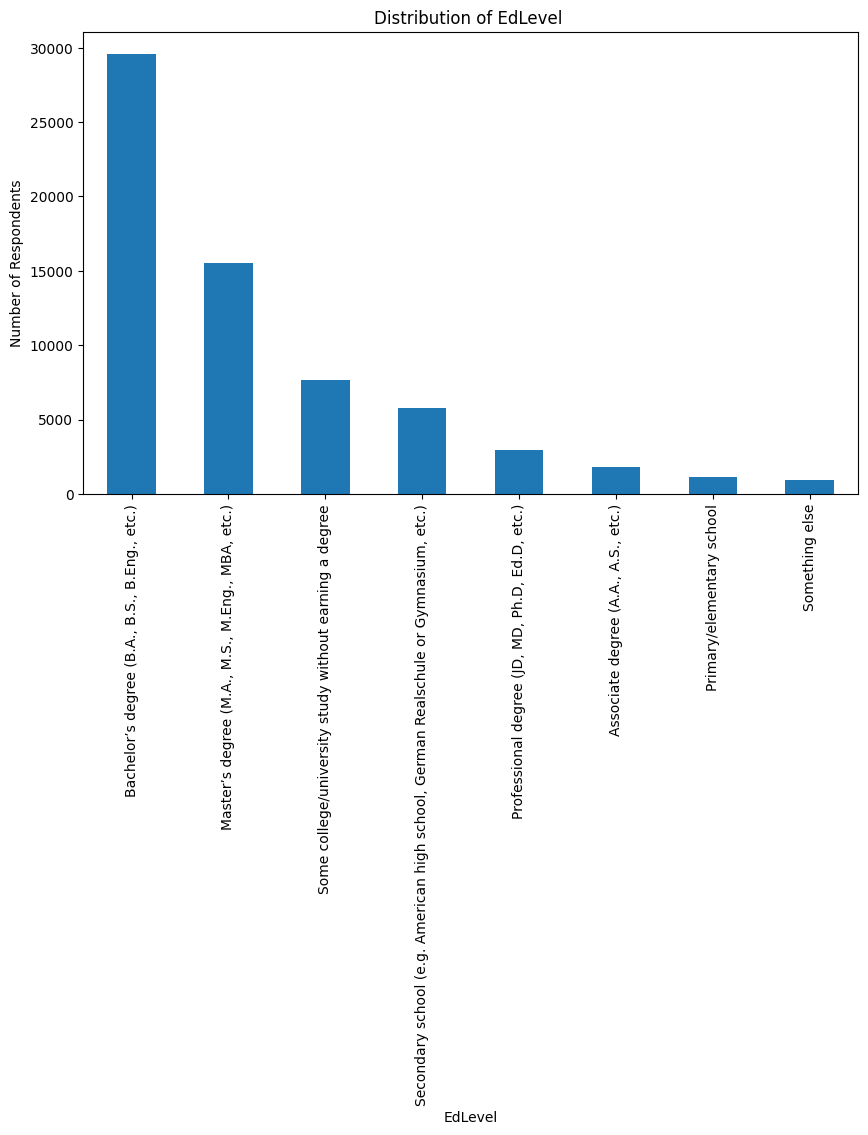

In [39]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Bar chart for Edlevel  distribution
age_dist = df['EdLevel'].value_counts()
plt.figure(figsize=(10, 6))
age_dist.plot(kind='bar')
plt.title('Distribution of EdLevel ')
plt.xlabel('EdLevel')
plt.ylabel('Number of Respondents')
plt.show()